In [33]:
import pandas as pd
import json

conference = "sigir"

# Load data
with open(f"../data/interim/dblp_{conference}_openalex.jsonl", "r") as file:
    publications = [json.loads(line) for line in file]

In [34]:
publications_10 = []
for publication in publications:
    year = publication["info"]["year"]
    if int(year) >= 2014:
        publications_10.append(publication)

In [35]:
print(f"{conference.upper()} has {len(publications_10)} publications in total.")

SIGIR has 3454 publications in total.


# Has openalex

In [36]:
with_open_alex = []
open_alex_none = []
for publication in publications_10:
    if publication["openalex"]:
        with_open_alex.append(publication)
    else:
        open_alex_none.append(publication)

In [37]:
print(f"{conference.upper()} has {len(with_open_alex)} publications with open alex.")
print(f"{conference.upper()} has {len(open_alex_none)} publications without open alex.")

SIGIR has 3147 publications with open alex.
SIGIR has 307 publications without open alex.


# Has ror

In [38]:
# Load data
with open(f"../data/interim/dblp_{conference}_openalex_ror.jsonl", "r") as file:
    publications = [json.loads(line) for line in file]

In [39]:
publications_10 = []
for publication in publications:
    year = publication["info"]["year"]
    if int(year) >= 2014:
        publications_10.append(publication)
publications = publications_10

In [40]:
with_all_ror = []
with_some_ror = []
without_ror = []
for publication in publications:
    found = [False]
    if publication["openalex"]:
        for author in publication["openalex"]["authorships"]:
            found_author = False
            for institution in author["institutions"]:
                if institution["ror_data"]:
                    found_author = True
            if found_author:
                found.append(True)

        if all(found):
            with_all_ror.append(publication)
        elif any(found):
            with_some_ror.append(publication)
        else:
            without_ror.append(publication)

print(f"{conference.upper()} has {len(with_all_ror)} publications with all ror.")
print(f"{conference.upper()} has {len(with_some_ror)} publications with some ror.")
print(f"{conference.upper()} has {len(without_ror)} publications without ror.")
    

SIGIR has 0 publications with all ror.
SIGIR has 3043 publications with some ror.
SIGIR has 104 publications without ror.


# GERIT

In [41]:
with open(f"../data/interim/dblp_{conference}_openalex_ror_gerit.jsonl", "r") as file:
    publications = [json.loads(line) for line in file]

In [42]:
publications_10 = []
for publication in publications:
    year = publication["info"]["year"]
    if int(year) >= 2014:
        publications_10.append(publication)
publications = publications_10

In [43]:
with_all_gerit = []
with_some_gerit = []
without_gerit = []
for publication in publications:
    found = [False]
    if publication["openalex"]:
        for author in publication["openalex"]["authorships"]:
            found_author = False
            for institution in author["institutions"]:
                if institution["gerit_data"]:
                    found_author = True
            if found_author:
                found.append(True)

        if all(found):
            with_all_gerit.append(publication)
        elif any(found):
            with_some_gerit.append(publication)
        else:
            without_gerit.append(publication)

print(f"{conference.upper()} has {len(with_all_gerit)} publications with all GERIT.")
print(f"{conference.upper()} has {len(with_some_gerit)} publications with some GERIT.")
print(f"{conference.upper()} has {len(without_gerit)} publications without GERIT.")
    

SIGIR has 0 publications with all GERIT.
SIGIR has 138 publications with some GERIT.
SIGIR has 3009 publications without GERIT.


# GERMAN

In [44]:
# filter for german publications
publications_german = []
for publication in publications:
    german = False
    if publication["openalex"]:
        for author in publication["openalex"]["authorships"]:
            if "DE" in author["countries"]:
                german = True
    if german:
        publications_german.append(publication)

In [45]:
print(f"{conference.upper()} has {len(publications_german)} german publications.")

SIGIR has 158 german publications.


# German ROR

In [46]:
with_all_ror = []
with_some_ror = []
without_ror = []
for publication in publications_german:
    found = [False]
    if publication["openalex"]:
        for author in publication["openalex"]["authorships"]:
            found_author = False
            for institution in author["institutions"]:
                if institution["ror_data"]:
                    found_author = True
            if found_author:
                found.append(True)

        if all(found):
            with_all_ror.append(publication)
        elif any(found):
            with_some_ror.append(publication)
        else:
            without_ror.append(publication)

print(f"{conference.upper()} has {len(with_all_ror)} publications with all ror.")
print(f"{conference.upper()} has {len(with_some_ror)} publications with some ror.")
print(f"{conference.upper()} has {len(without_ror)} publications without ror.")
    

SIGIR has 0 publications with all ror.
SIGIR has 157 publications with some ror.
SIGIR has 1 publications without ror.


# German with Gerit

In [47]:
with_all_gerit = []
with_some_gerit = []
without_gerit = []
for publication in publications_german:
    found = [False]
    if publication["openalex"]:
        for author in publication["openalex"]["authorships"]:
            found_author = False
            for institution in author["institutions"]:
                if institution["gerit_data"]:
                    found_author = True
            if found_author:
                found.append(True)

        if all(found):
            with_all_gerit.append(publication)
        elif any(found):
            with_some_gerit.append(publication)
        else:
            without_gerit.append(publication)

print(f"{conference.upper()} has {len(with_all_gerit)} publications with all GERIT.")
print(f"{conference.upper()} has {len(with_some_gerit)} publications with some GERIT.")
print(f"{conference.upper()} has {len(without_gerit)} publications without GERIT.")

SIGIR has 0 publications with all GERIT.
SIGIR has 138 publications with some GERIT.
SIGIR has 20 publications without GERIT.


# Group by year

In [48]:
german_publications_year = {}
for publication in publications_german:
    year = publication["info"]["year"]
    if year not in german_publications_year:
        german_publications_year[year] = 0
    german_publications_year[year] += 1

In [49]:
# add years without publications
for year in range(2014, 2023):
    if str(year) not in german_publications_year:
        german_publications_year[str(year)] = 0

<Axes: title={'center': 'Publications at SIGIR with German contribution by year'}>

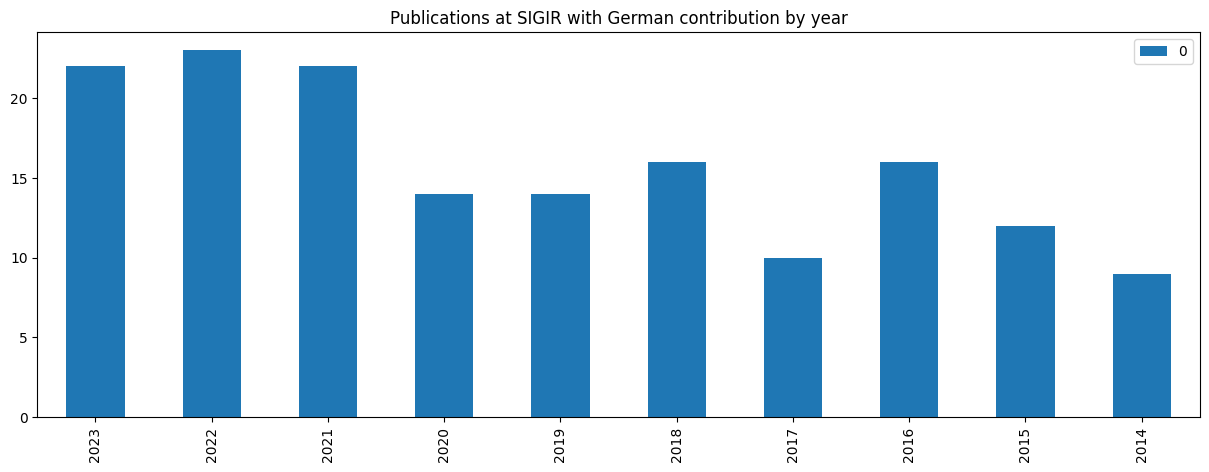

In [50]:
# plot by year with gaps if no publications 
df = pd.DataFrame.from_dict(german_publications_year, orient="index")
df.sort_index(ascending=False, inplace=True)
df.plot(kind="bar", figsize=(15, 5), title=f"Publications at {conference.upper()} with German contribution by year")


In [58]:
authow_without_any_institutions = 0
num_institutions_mentioned = 0
num_authors = 0
authors_with_ror = 0
authors_with_gerit = 0

for publication in publications_german:
    found = [False]
    if publication["openalex"]:
        for author in publication["openalex"]["authorships"]:
            num_authors += 1
            if len(author["institutions"]) == 0:
                authow_without_any_institutions += 1
            else:
                num_institutions_mentioned += len(author["institutions"])
                for institution in author["institutions"]:
                    if institution["ror_data"]:
                        authors_with_ror += 1
                    if institution["gerit_data"]:
                        authors_with_gerit += 1

In [60]:
print(f"{conference.upper()} has {num_authors} authors.")
print(f"{conference.upper()} has {authow_without_any_institutions} authors without any institution.")
print ("---")
print(f"{conference.upper()} has {num_institutions_mentioned} institutions mentioned.")
print(f"{conference.upper()} has {authors_with_ror} institution with ror.")
print(f"{conference.upper()} has {authors_with_gerit} institution with gerit.")


SIGIR has 656 authors.
SIGIR has 29 authors without any institution.
---
SIGIR has 659 institutions mentioned.
SIGIR has 659 institution with ror.
SIGIR has 389 institution with gerit.
